In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import io
from tqdm import tqdm

C:\Users\hollo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
C:\Users\hollo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


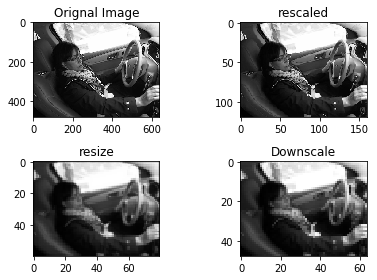

In [2]:
# img=cv2.imread('/Users/Juan/Desktop/CS4662/imgs/test/img_1.jpg',cv2.IMREAD_GRAYSCALE)
img=cv2.imread('/Users/hollo/Desktop/DataScience/project/imgs/test/img_1.jpg',cv2.IMREAD_GRAYSCALE)


img_rescale = rescale(img, 1.0/4.0, anti_aliasing = False)
img_resize = resize(img, (img.shape[0] / 8, img.shape[1] / 8),anti_aliasing=True)
img_downscale = downscale_local_mean(img, (10, 10))

fig, axes = plt.subplots(nrows=2, ncols=2)
ax = axes.ravel()

ax[0].imshow(img,cmap="gray")
ax[0].set_title("Orignal Image")

ax[1].imshow(img_rescale,cmap="gray")
ax[1].set_title("rescaled")


ax[2].imshow(img_resize,cmap="gray")
ax[2].set_title("resize")

ax[3].imshow(img_downscale,cmap="gray")
ax[3].set_title("Downscale")


plt.tight_layout()
plt.show()


In [10]:
print(img.shape)
print(img.size)
print(img_downscale.size)
print(img_downscale.shape)
print(img_resize.size)

(480, 640)
307200
3072
(48, 64)
4800


In [11]:
# training path

# DATADIR = "/Users/Juan/Desktop/CS4662/imgs/test"
DATADIR = "/Users/hollo/Desktop/DataScience/project/imgs/test"

# using downsize

In [12]:
rescale_td=[]
resize_td=[]
downscale_td=[]

def create_testData():
    path = os.listdir(DATADIR)
    for image in tqdm(path):
        img = os.path.join(DATADIR,image)
        img_array=cv2.imread(img,cv2.IMREAD_GRAYSCALE)
        img_downscale = downscale_local_mean(img_array, (10, 10))            
        downscale_td.append(img_downscale)

    

In [13]:
create_testData()

100%|███████████████████████████████████████████████████████████████████████████| 79726/79726 [11:24<00:00, 116.43it/s]


In [15]:
a = np.array(downscale_td)

In [16]:
a.shape

(79726, 48, 64)

In [19]:
a.shape = -1,3072

In [20]:
df_test = pd.DataFrame(a)

In [21]:
print(df_test.head())

     0       1       2       3       4       5       6      7      8     \
0   53.81   53.13   52.06   51.87   52.94   53.65   53.19  52.47  55.18   
1   71.86   20.83   14.94   51.63   89.04  119.71  106.04  83.25  84.23   
2   33.07   34.94   38.38   39.68   40.61   39.92   38.98  39.67  39.64   
3  146.40  169.88  193.16  212.03  179.19  138.66   73.56  60.89  52.89   
4   47.01   47.87   50.72   54.46   55.45   55.58   81.79  76.72  24.17   

    9     ...    3062    3063    3064    3065    3066    3067   3068   3069  \
0  59.52  ...   52.02   99.03  118.10  116.58   28.31   10.27  39.25  20.91   
1  79.26  ...   42.18   67.50   79.43   69.21   24.39   22.43  19.12  18.65   
2  40.43  ...   68.41  102.61  122.84  111.47   43.40   26.64  10.95  11.60   
3  55.91  ...   11.00   23.81   79.15   67.86   62.59   40.24  45.44  48.73   
4  37.45  ...  161.97  173.81  172.41  162.94  139.07  116.39  95.89  39.01   

    3070   3071  
0  11.89  20.12  
1  16.19  16.11  
2  20.31  15.62  
3 

# Export test DataFrame

In [22]:
df_test.to_pickle('testDF')

# Read test DataFrame

In [4]:
df_test=pd.read_pickle('testDF')